In [54]:
# import pickle
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.feature_extraction import DictVectorizer
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

In [3]:
# df_1 = pd.read_parquet("dataset/green_tripdata_2021-01.parquet")

In [4]:
# df_1.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.5,0.5,0.5,0.00,0.0,None,0.3,6.80,2.0,1.0,0.00
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.0,0.5,0.5,2.81,0.0,None,0.3,16.86,1.0,1.0,2.75
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.0,0.5,0.5,1.00,0.0,None,0.3,8.30,1.0,1.0,0.00
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.0,0.5,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00
4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.0,0.0,-0.5,0.00,0.0,None,-0.3,-52.80,3.0,1.0,0.00


In [5]:
# df_1.lpep_pickup_datetime = pd.to_datetime(df_1.lpep_pickup_datetime)
# df_1.lpep_dropoff_datetime = pd.to_datetime(df_1.lpep_dropoff_datetime)

In [8]:
# df_1["duration"] = df_1.lpep_dropoff_datetime - df_1.lpep_pickup_datetime
# df_1.duration = df_1.duration.apply(lambda td: td.total_seconds()/60)

In [6]:
# df_1 = df_1[df_1.trip_type == 2]

In [22]:
# df_1.duration.describe(percentiles=[0.95, 0.98, 0.99])
# # sns.distplot(df_1.duration)

count    1238.000000
mean       18.305493
std       108.364382
min         0.000000
50%         1.666667
95%        35.604167
98%        59.339333
99%       149.837833
max      1416.100000
Name: duration, dtype: float64

In [38]:
# df_1 = df_1[(df_1.duration >= 1) & (df_1.duration <= 60)]

In [39]:
# categorical = ['PULocationID', 'DOLocationID']
# numerical = ['trip_distance']

In [40]:
# df_1[categorical] = df_1[categorical].astype(str)

/tmp/ipykernel_1570/4178788713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[categorical] = df_1[categorical].astype(str)


In [41]:
# train_dict = df_1[categorical + numerical].to_dict(orient='records')

In [42]:
# dv = DictVectorizer()
# x_train = dv.fit_transform(train_dict)

In [43]:
# target = 'duration'
# y_train = df_1[target].values

In [44]:
# lr = LinearRegression()
# lr.fit(x_train, y_train)

LinearRegression()

In [45]:
# y_pred = lr.predict(x_train)

/tmp/ipykernel_1570/1351390157.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/tmp/ipykernel_1570/1351390157.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')


<Axes: ylabel='Density'>

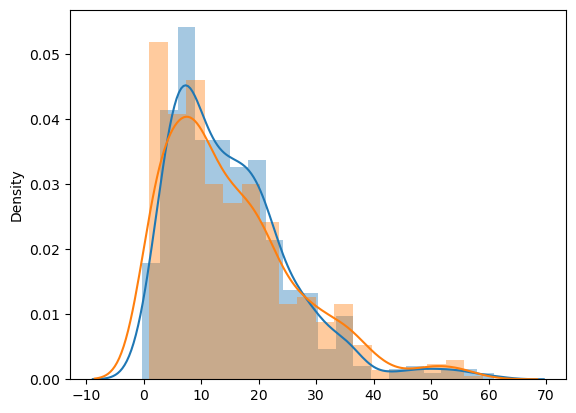

In [46]:
# sns.distplot(y_pred, label='prediction')
# sns.distplot(y_train, label='actual')

In [48]:
# mean_squared_error(y_pred, y_train, squared=False)

4.803126264559265

In [24]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [58]:
def read_dataframe(filename):
    df = pd.read_parquet(filename)
    df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
    df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)

    df["duration"] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds()/60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']

    df[categorical] = df[categorical].astype(str)
    return df

In [50]:
df_train = read_dataframe("dataset/green_tripdata_2021-01.parquet")
df_val = read_dataframe("dataset/green_tripdata_2021-02.parquet")

In [51]:
len(df_train), len(df_val)

(73908, 61921)

In [53]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

dv = DictVectorizer()


train_dict = df_train[categorical + numerical].to_dict(orient='records')
x_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
x_val = dv.transform(val_dict)


target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_val)

mean_squared_error(y_pred, y_val, squared=False)

10.499110713790529

In [2]:
with open('models/lin_reg.bin', 'wb') as file:
    pickle.dump((dv, lr), file)

NameError: name 'dv' is not defined

In [70]:
df = pd.read_parquet("dataset/yellow_tripdata_2022-01.parquet")
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.50,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.00,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.50,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.00,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.50,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463926,2,2022-01-31 23:36:53,2022-01-31 23:42:51,NaN,1.32,NaN,None,90,170,0,8.00,0.0,0.5,2.39,0.0,0.3,13.69,NaN,NaN
2463927,2,2022-01-31 23:44:22,2022-01-31 23:55:01,NaN,4.19,NaN,None,107,75,0,16.80,0.0,0.5,4.35,0.0,0.3,24.45,NaN,NaN
2463928,2,2022-01-31 23:39:00,2022-01-31 23:50:00,NaN,2.10,NaN,None,113,246,0,11.22,0.0,0.5,2.00,0.0,0.3,16.52,NaN,NaN
2463929,2,2022-01-31 23:36:42,2022-01-31 23:48:45,NaN,2.92,NaN,None,148,164,0,12.40,0.0,0.5,0.00,0.0,0.3,15.70,NaN,NaN


In [71]:
df["duration"] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds()/60)
df.duration.describe().apply("{0:.2f}".format)

count    2463931.00
mean          14.21
std           46.45
min        -3442.40
25%            6.32
50%           10.18
75%           16.17
max         8513.18
Name: duration, dtype: object

In [72]:
df = df[(df.duration >= 1) & (df.duration <= 60)]

In [73]:
dv = DictVectorizer()
categorical = ['PULocationID', 'DOLocationID']
df[categorical] = df[categorical].astype(str)
train_dict = df[categorical].to_dict(orient='records')
x_train = dv.fit_transform(train_dict)

/tmp/ipykernel_1573/2162487702.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical] = df[categorical].astype(str)


In [74]:
# dv.feature_names_
print(f'Feature matrix size: {x_train.shape}')

Feature matrix size: (2421440, 515)


In [75]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

dv = DictVectorizer()
df[categorical] = df[categorical].astype(str)
train_dict = df[categorical].to_dict(orient='records')
x_train = dv.fit_transform(train_dict)

# val_dict = df_val[categorical + numerical].to_dict(orient='records')
# x_val = dv.transform(val_dict)

target = 'duration'
y_train = df[target].values
# y_val = df[target].values

lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_train)



/tmp/ipykernel_1573/2507394265.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical] = df[categorical].astype(str)


In [76]:
mean_squared_error(y_pred, y_train, squared=False)

6.986190836477672

In [77]:
df = pd.read_parquet("dataset/yellow_tripdata_2022-02.parquet")
df["duration"] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds()/60)
# df.duration.describe().apply("{0:.2f}".format)
df = df[(df.duration >= 1) & (df.duration <= 60)]
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']
# 
# dv = DictVectorizer()
df[categorical] = df[categorical].astype(str)
val_dict = df[categorical].to_dict(orient='records')
x_val = dv.transform(val_dict)
# x_train = dv.fit_transform(train_dict)

# val_dict = df_val[categorical + numerical].to_dict(orient='records')
# x_val = dv.transform(val_dict)

target = 'duration'
y_train = df[target].values
# y_val = df[target].values

# lr = LinearRegression()
# lr.fit(x_train, y_train)

y_pred = lr.predict(x_val)

mean_squared_error(y_pred, y_train, squared=False)

7.78640879016696